## Preperation

In [1]:
elist = [('A', 'B'), ('A', 'C'), ('B', 'D')]

In [2]:
[s for s,t in elist]

['A', 'A', 'B']

In [3]:
[t for s,t in elist]

['B', 'C', 'D']

In [4]:
[s for s,t in elist] + [t for s,t in elist]

['A', 'A', 'B', 'B', 'C', 'D']

In [5]:
set([s for s,t in elist] + [t for s,t in elist])

{'A', 'B', 'C', 'D'}

In [6]:
list(set([s for s,t in elist] + [t for s,t in elist]))

['B', 'A', 'C', 'D']

# Our own graph class
 - It uses networkx library for visualization

In [7]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
class node():
    def __init__(self, name):
        self.name = name
        self.neighbors = []
        self.visited = False
        self.prev = None  
        
    def neighbors_name(self):
        return [node_s.name for node_s in self.neighbors]
        

In [9]:
class graph():
    def __init__(self, elist):
        self.elist = elist
        self.node_names = list(set([s for s,t in elist] + [t for s,t in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        
        self.create_graph()
        
    def add_edge(self, s,t):
        self.nodes[s].neighbors.append(self.nodes[t])
        self.nodes[t].neighbors.append(self.nodes[s])
    
    def create_graph(self):
        for s,t in self.elist:
             self.add_edge(s,t)
                
    def info(self):
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'lightblue'):
        G = nx.Graph()
        G.add_edges_from(self.elist)
        plt.figure(figsize=(20,10))
        nx.draw(G, node_size=500, node_color=color, with_labels=True)
             

In [10]:
elist = [('A', 'B'), ('A', 'C'), ('C', 'D'), ('C', 'B'), ('E', 'D'), ('F', 'D'), ('A', 'E')]

In [11]:
G = graph(elist)

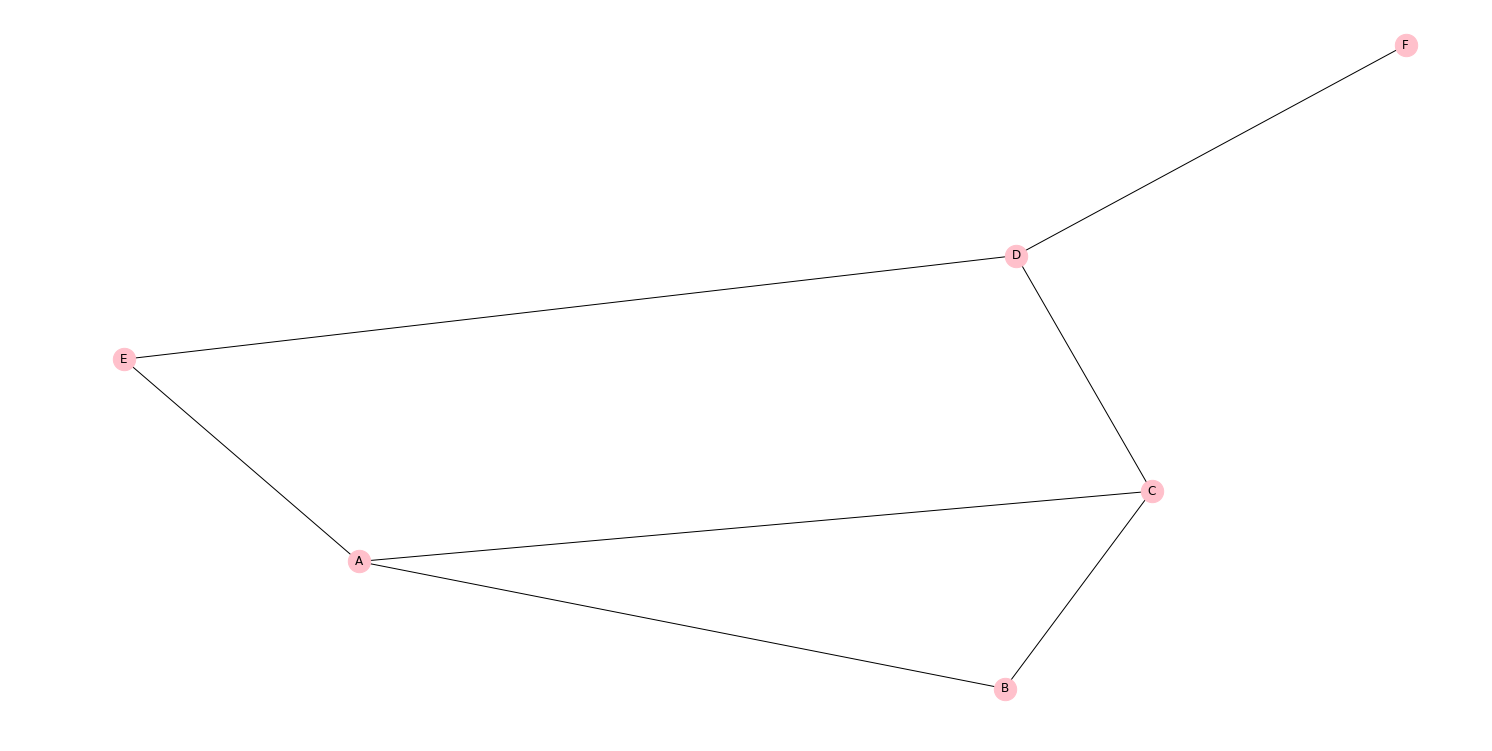

In [12]:
G.draw('pink')

In [13]:
G.info()

{'F': ['D'],
 'C': ['A', 'D', 'B'],
 'D': ['C', 'E', 'F'],
 'B': ['A', 'C'],
 'E': ['D', 'A'],
 'A': ['B', 'C', 'E']}

## Recursive DFS algorithm

In [14]:
class RecursiveDepthFirstSearch():   
    def __init__(self, G):
        self.G = G
        self.traversal = []
        
    def dfs(self, s_name):
        G.nodes[s_name].visited = True
        self.traversal.append(s_name)
        
        for neighbor in G.nodes[s_name].neighbors:
            if not neighbor.visited:
                self.dfs(neighbor.name)

DFS Traversal from node D is ['D', 'C', 'A', 'B', 'E', 'F']


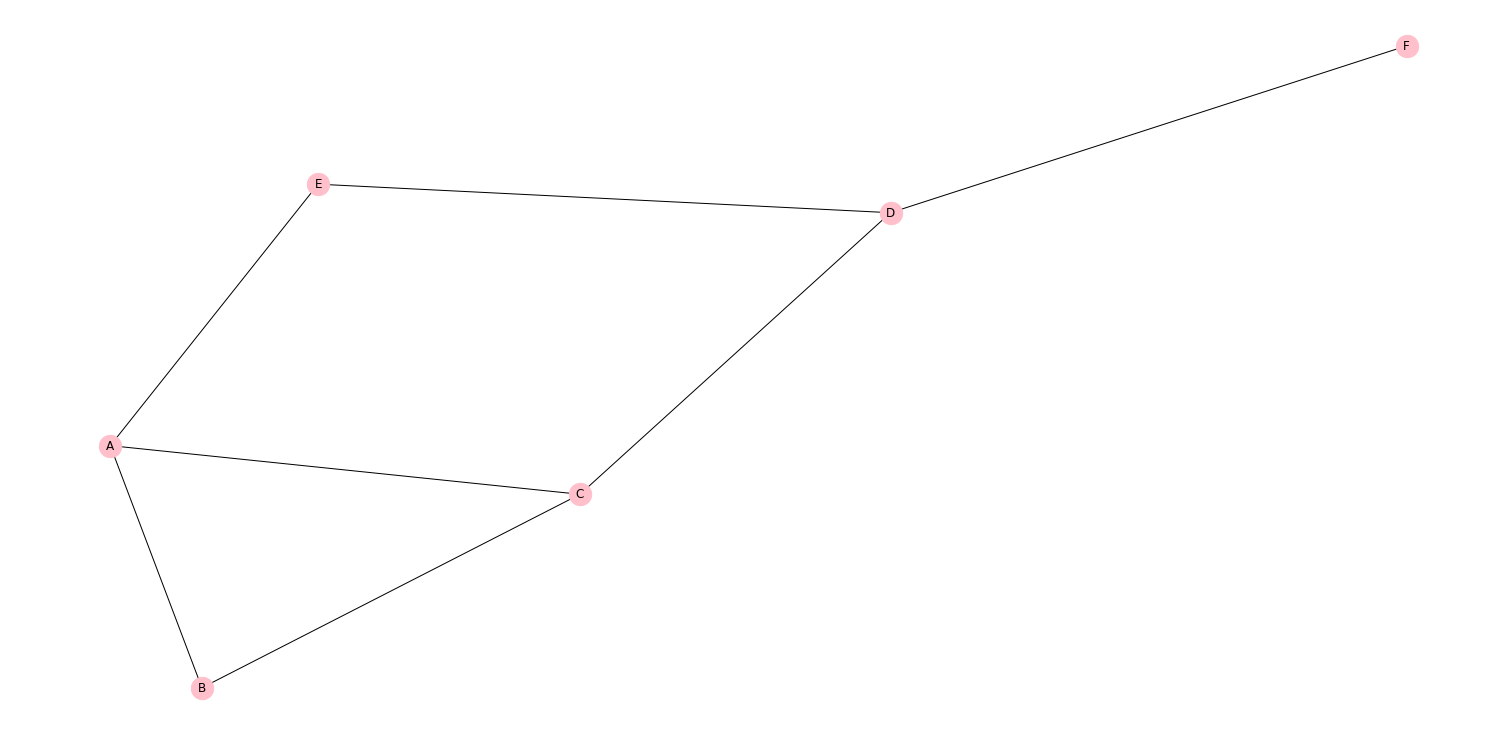

In [15]:
elist = [('A', 'B'), ('A', 'C'), ('C', 'D'), ('C', 'B'), ('E', 'D'), ('F', 'D'), ('A', 'E')]
G = graph(elist)

s_name = 'D'
dfs = RecursiveDepthFirstSearch(G)
dfs.dfs(s_name)
G.draw('pink')
print('DFS Traversal from node {} is {}'.format(s_name, dfs.traversal))

## Example from the book

In [16]:
str_elist = """
0 6
0 2
0 1
3 5
4 5
4 6
0 5
3 4
7 8
9 11
9 10
11 12
9 12
"""

In [17]:
str_elist.split('\n')

['',
 '0 6',
 '0 2',
 '0 1',
 '3 5',
 '4 5',
 '4 6',
 '0 5',
 '3 4',
 '7 8',
 '9 11',
 '9 10',
 '11 12',
 '9 12',
 '']

In [18]:
elist = [tuple(line.split(' ')) for line in str_elist.split('\n') if line != '']
elist

[('0', '6'),
 ('0', '2'),
 ('0', '1'),
 ('3', '5'),
 ('4', '5'),
 ('4', '6'),
 ('0', '5'),
 ('3', '4'),
 ('7', '8'),
 ('9', '11'),
 ('9', '10'),
 ('11', '12'),
 ('9', '12')]

DFS Traversal from node 0 is ['0', '6', '4', '5', '3', '2', '1']


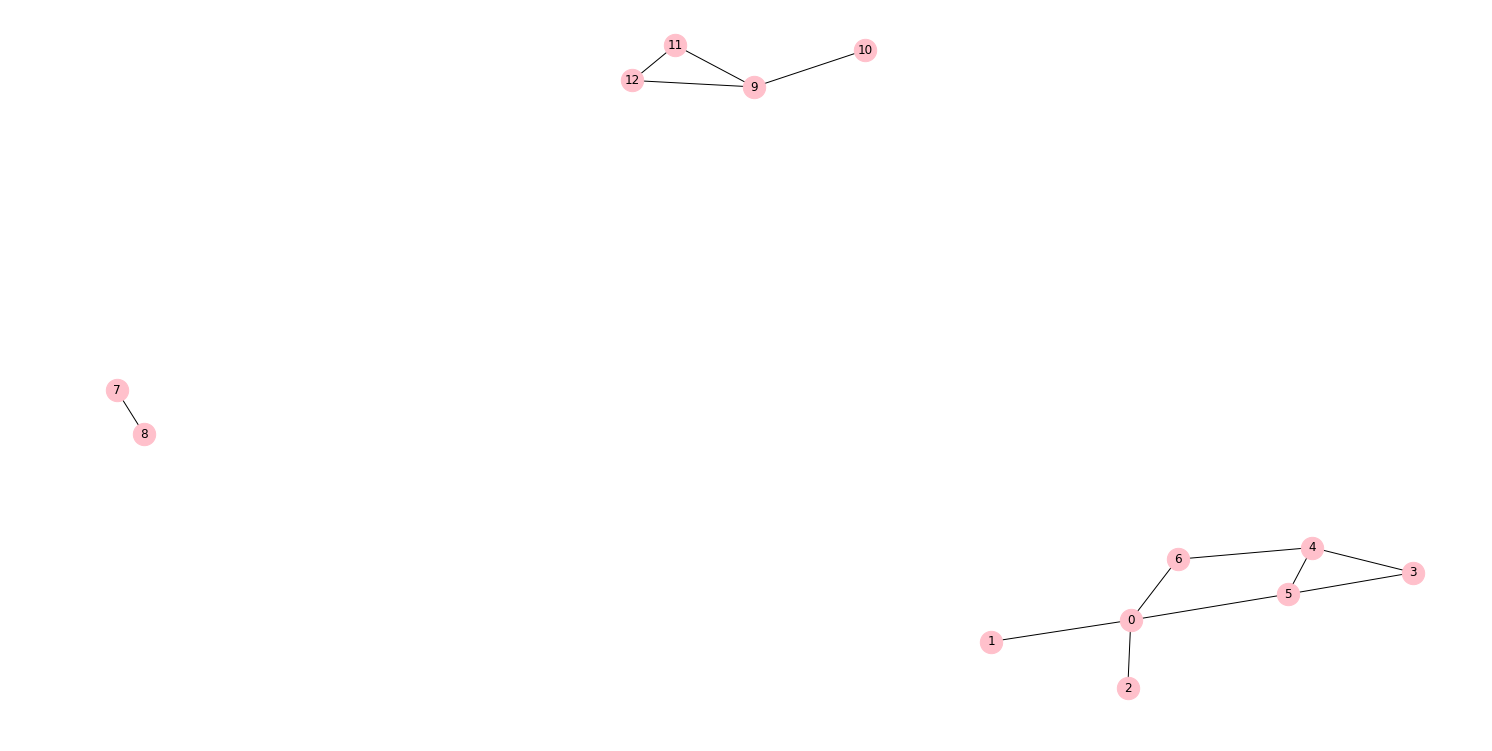

In [19]:
G = graph(elist)

s_name = '0'
dfs = RecursiveDepthFirstSearch(G)
dfs.dfs(s_name)
G.draw('pink')
print('DFS Traversal from node {} is {}'.format(s_name, dfs.traversal))

In [20]:
GR = G.info()
GR

{'4': ['5', '6', '3'],
 '11': ['9', '12'],
 '2': ['0'],
 '12': ['11', '9'],
 '5': ['3', '4', '0'],
 '3': ['5', '4'],
 '0': ['6', '2', '1', '5'],
 '10': ['9'],
 '1': ['0'],
 '6': ['0', '4'],
 '8': ['7'],
 '7': ['8'],
 '9': ['11', '10', '12']}

In [21]:
type(G.info())

dict

In [22]:
{str(i):GR[str(i)] for i in range(13)}

{'0': ['6', '2', '1', '5'],
 '1': ['0'],
 '2': ['0'],
 '3': ['5', '4'],
 '4': ['5', '6', '3'],
 '5': ['3', '4', '0'],
 '6': ['0', '4'],
 '7': ['8'],
 '8': ['7'],
 '9': ['11', '10', '12'],
 '10': ['9'],
 '11': ['9', '12'],
 '12': ['11', '9']}

DFS Traversal from node 0 is ['0', '6', '4', '5', '3', '2', '1']


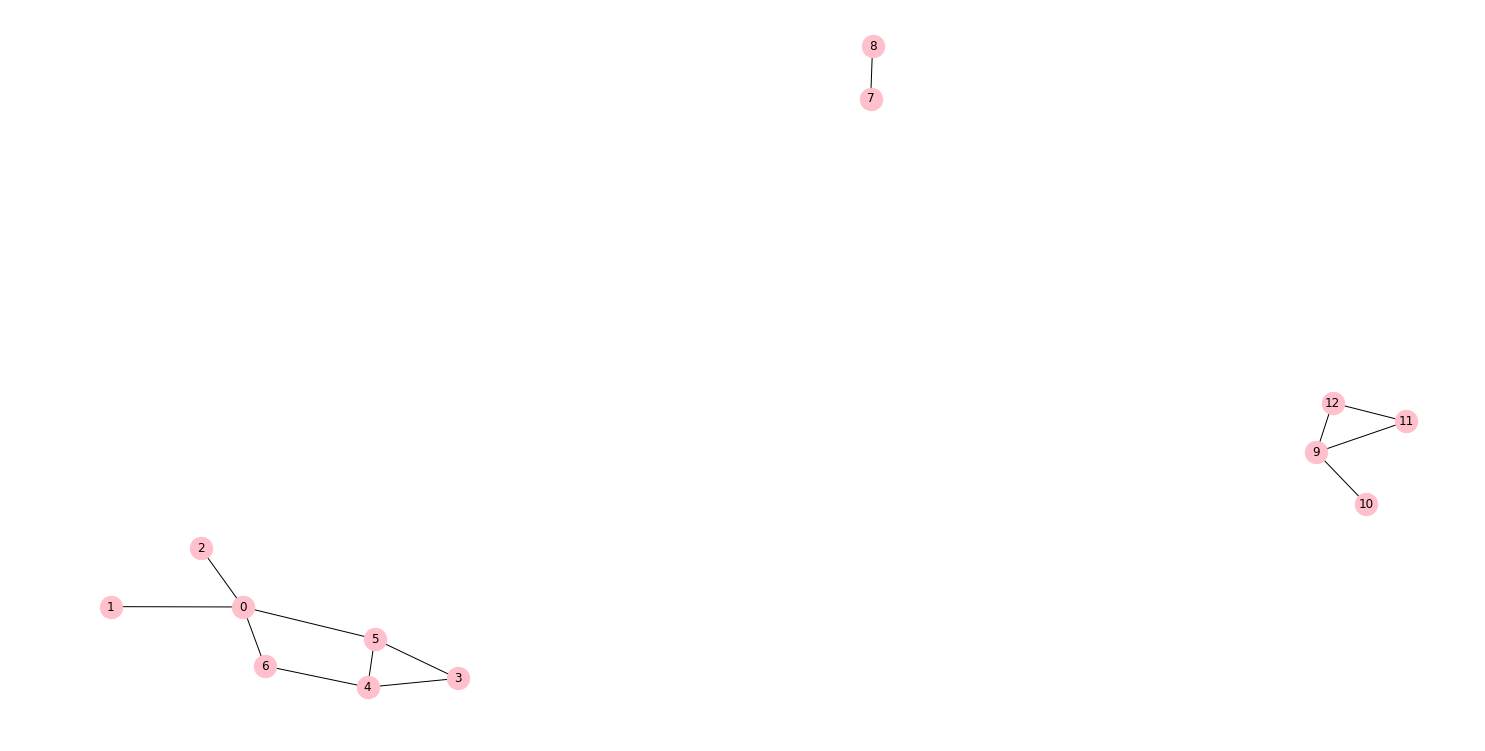

In [23]:
G = graph(elist)

s_name = '0'
dfs = RecursiveDepthFirstSearch(G)
dfs.dfs(s_name)
G.draw('pink')
print('DFS Traversal from node {} is {}'.format(s_name, dfs.traversal))

## BFS algorithm

In [24]:
class BreadthFirstSearch():
    def __init__(self, G):
        self.queue = []
        self.traversal = []
    
    def bfs(self, s_name):
        self.queue.append(s_name)
        G.nodes[s_name].visited = True
        self.traversal.append(s_name)
        
        while self.queue:
            v_name = self.queue.pop(0)
            
            for neighbor in G.nodes[v_name].neighbors:
                if not neighbor.visited:
                    self.queue.append(neighbor.name)
                    
                    neighbor.visited = True
                    self.traversal.append(neighbor.name)
                    
                    neighbor.prev = v_name
        

BFS Traversal from node 0 is ['0', '6', '2', '1', '5', '4', '3']


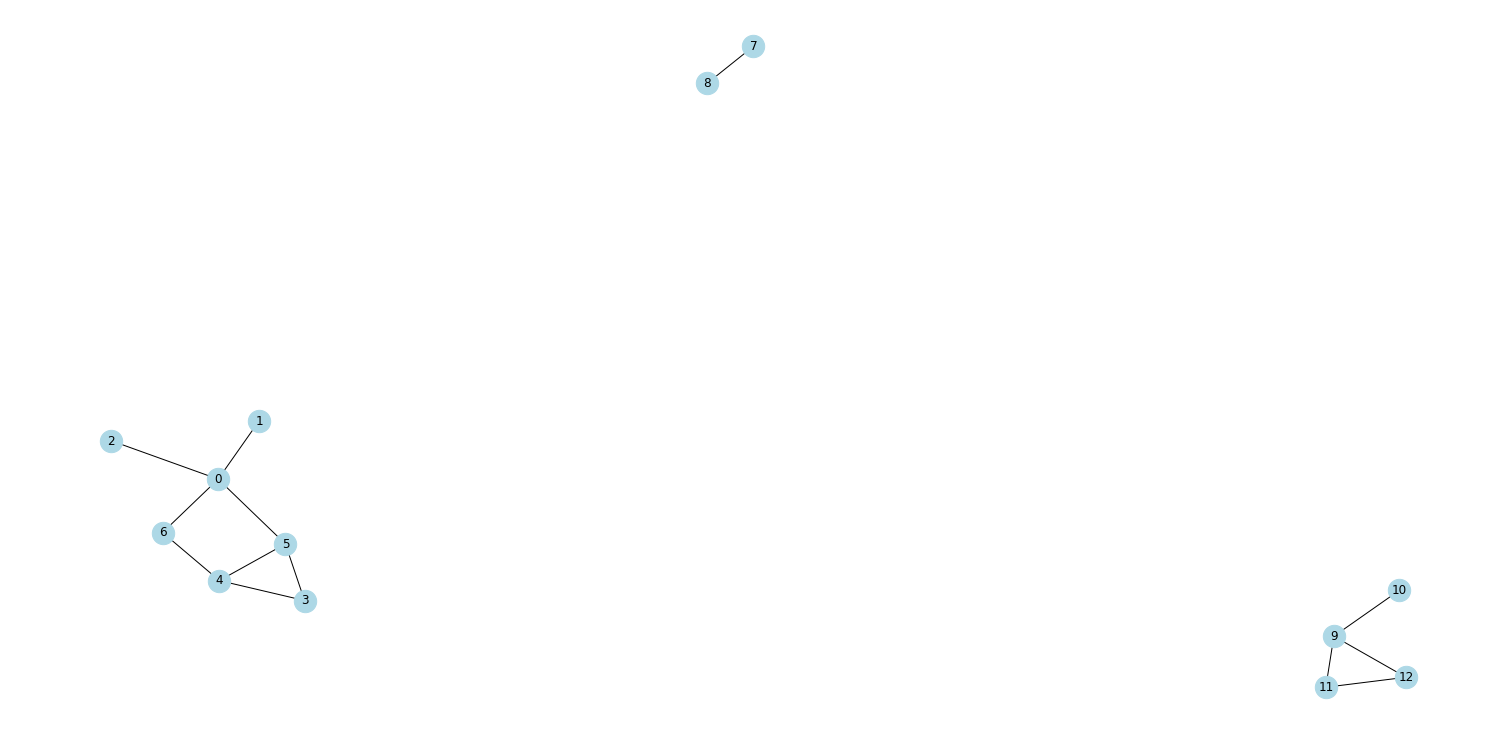

In [25]:
G = graph(elist)

s_name = '0'
bfs = BreadthFirstSearch(G)
bfs.bfs(s_name)
G.draw('lightblue')
print('BFS Traversal from node {} is {}'.format(s_name, bfs.traversal))

## Iterative DFS

In [31]:
class IterativeDepthFirstSearch():
    def __init__(self, G):
        self.stack = []
        self.traversal = []
    
    def dfs(self, s_name):
        self.stack.append(s_name)
        
        while self.stack:
            v_name = self.stack.pop()
            G.nodes[v_name].visited = True
            self.traversal.append(v_name)
            
            for neighbor in G.nodes[v_name].neighbors:
                if not neighbor.visited:                    
                    self.stack.append(neighbor.name)
                    #neighbor.prev = v_name
        

DFS Traversal from node 0 is ['0', '5', '4', '3', '6', '3', '1', '2', '6']


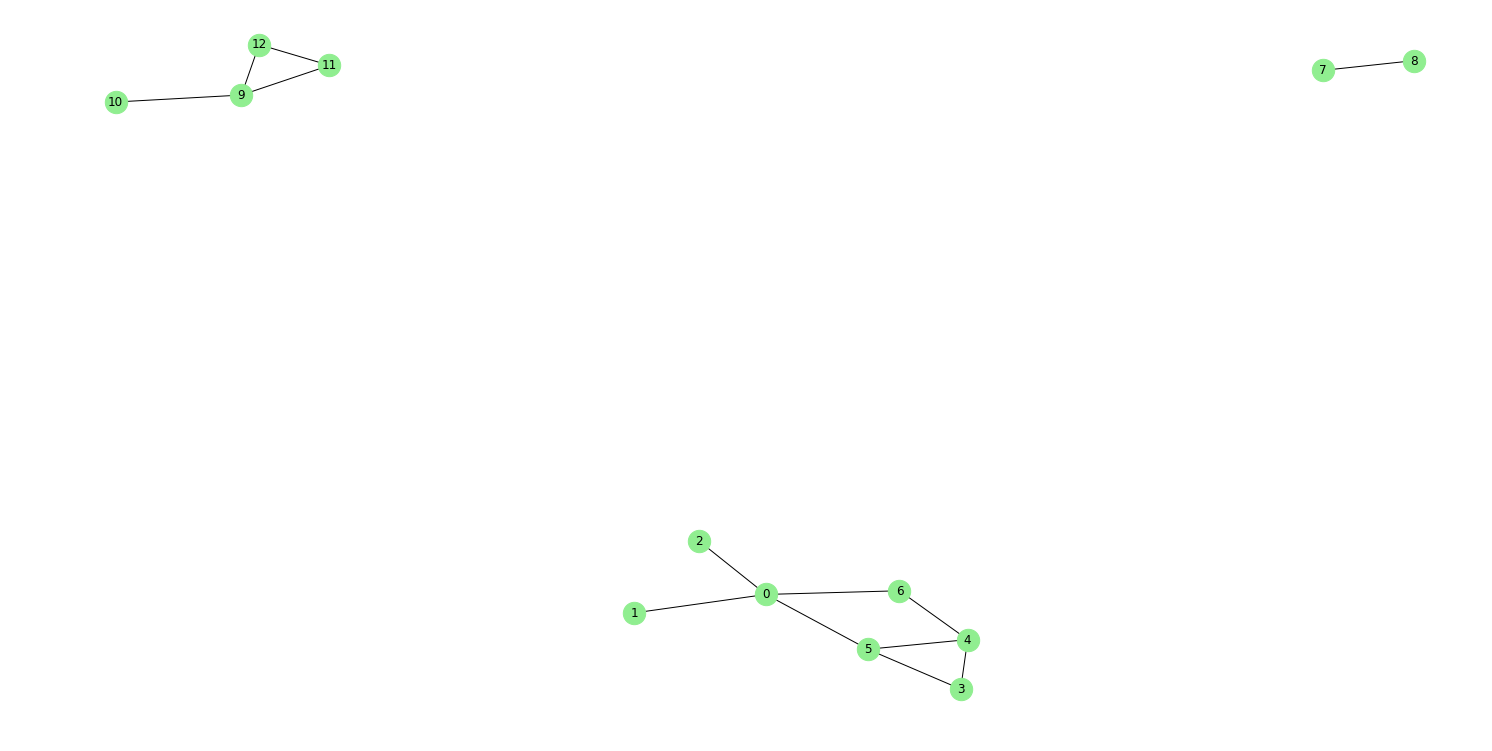

In [32]:
G = graph(elist)

s_name = '0'
dfs = IterativeDepthFirstSearch(G)
dfs.dfs(s_name)
G.draw('lightgreen')
print('DFS Traversal from node {} is {}'.format(s_name, dfs.traversal))

In [28]:
G.info()

{'4': ['5', '6', '3'],
 '11': ['9', '12'],
 '2': ['0'],
 '12': ['11', '9'],
 '5': ['3', '4', '0'],
 '3': ['5', '4'],
 '0': ['6', '2', '1', '5'],
 '10': ['9'],
 '1': ['0'],
 '6': ['0', '4'],
 '8': ['7'],
 '7': ['8'],
 '9': ['11', '10', '12']}